In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [6]:
df.shape

(84548, 22)

In [7]:
df.columns = df.columns.str.lower()

In [8]:
# df['sale price'] = pd.to_numeric(df['sale price'],errors='coerce')

num_var = ['land square feet', 'gross square feet',
       'sale price']

for i in num_var:
    df[i] = pd.to_numeric(df[i], errors = 'coerce')

In [9]:
df.isnull().sum()

unnamed: 0                            0
borough                               0
neighborhood                          0
building class category               0
tax class at present                  0
block                                 0
lot                                   0
ease-ment                             0
building class at present             0
address                               0
apartment number                      0
zip code                              0
residential units                     0
commercial units                      0
total units                           0
land square feet                  26252
gross square feet                 27612
year built                            0
tax class at time of sale             0
building class at time of sale        0
sale price                        14561
sale date                             0
dtype: int64

In [10]:
df = df[df['sale price'].notnull()]

In [11]:
df.isnull().sum()

unnamed: 0                            0
borough                               0
neighborhood                          0
building class category               0
tax class at present                  0
block                                 0
lot                                   0
ease-ment                             0
building class at present             0
address                               0
apartment number                      0
zip code                              0
residential units                     0
commercial units                      0
total units                           0
land square feet                  21188
gross square feet                 21739
year built                            0
tax class at time of sale             0
building class at time of sale        0
sale price                            0
sale date                             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   unnamed: 0                      69987 non-null  int64  
 1   borough                         69987 non-null  int64  
 2   neighborhood                    69987 non-null  object 
 3   building class category         69987 non-null  object 
 4   tax class at present            69987 non-null  object 
 5   block                           69987 non-null  int64  
 6   lot                             69987 non-null  int64  
 7   ease-ment                       69987 non-null  object 
 8   building class at present       69987 non-null  object 
 9   address                         69987 non-null  object 
 10  apartment number                69987 non-null  object 
 11  zip code                        69987 non-null  int64  
 12  residential units               

In [14]:
## Change categorical variables to the category data type
cat_vars = ['neighborhood', 'building class category', 'tax class at present', 'tax class at time of sale',
            'ease-ment', 'building class at present', 'address', 'apartment number',
            'building class at time of sale', 'borough', 'block', 'lot', 'zip code']

for col in cat_vars:
    df[col] = df[col].astype('O')
## Find all rows where values are blank

C:\Users\ritup\AppData\Local\Temp\ipykernel_1784\1979550778.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('O')


In [15]:
## Find all rows where values are blank, a single space, or only a single hyphen
## Replace these values with NaN

df.replace(['', ' ', '-'], np.nan, inplace = True)
df.isnull().sum()

C:\Users\ritup\AppData\Local\Temp\ipykernel_1784\3386815791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(['', ' ', '-'], np.nan, inplace = True)


unnamed: 0                            0
borough                               0
neighborhood                          0
building class category               0
tax class at present                673
block                                 0
lot                                   0
ease-ment                         69987
building class at present           673
address                               0
apartment number                  54491
zip code                              0
residential units                     0
commercial units                      0
total units                           0
land square feet                  21188
gross square feet                 21739
year built                            0
tax class at time of sale             0
building class at time of sale        0
sale price                            0
sale date                             0
dtype: int64

In [13]:
## Remove columns where all or too many values are NaN, namely ease-ment and apartment_number.

df.drop(['ease-ment', 'apartment number', 'neighborhood','building class category'], axis = 1, inplace=True)

In [14]:
df

,unnamed: 0,borough,tax class at present,block,lot,building class at present,address,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,building class at time of sale,sale price,sale date
0,4,1,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
3,7,1,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
6,10,1,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
9,13,1,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28 00:00:00
84544,8410,5,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21 00:00:00
84545,8411,5,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05 00:00:00
84546,8412,5,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21 00:00:00


In [15]:
df.drop(['address'], axis = 1, inplace=True)

In [16]:
## Remove columns where all or too many values are NaN, namely ease-ment and apartment_number.

df.drop(['tax class at present','building class at present', 'building class at time of sale'], axis = 1, inplace=True)

In [17]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unnamed: 0                 69987 non-null  int64  
 1   borough                    69987 non-null  int64  
 2   block                      69987 non-null  int64  
 3   lot                        69987 non-null  int64  
 4   zip code                   69987 non-null  int64  
 5   residential units          69987 non-null  int64  
 6   commercial units           69987 non-null  int64  
 7   total units                69987 non-null  int64  
 8   land square feet           48799 non-null  float64
 9   gross square feet          48248 non-null  float64
 10  year built                 69987 non-null  int64  
 11  tax class at time of sale  69987 non-null  int64  
 12  sale price                 69987 non-null  float64
 13  sale date                  69987 non-null  obj

unnamed: 0                       0
borough                          0
block                            0
lot                              0
zip code                         0
residential units                0
commercial units                 0
total units                      0
land square feet             21188
gross square feet            21739
year built                       0
tax class at time of sale        0
sale price                       0
sale date                        0
dtype: int64

<AxesSubplot:>

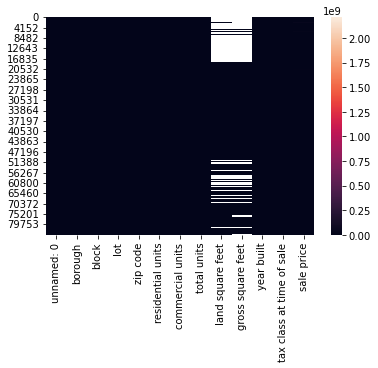

In [18]:
df_x = df.drop(['sale date'], axis = 1)
sns.heatmap(df_x)

<AxesSubplot:>

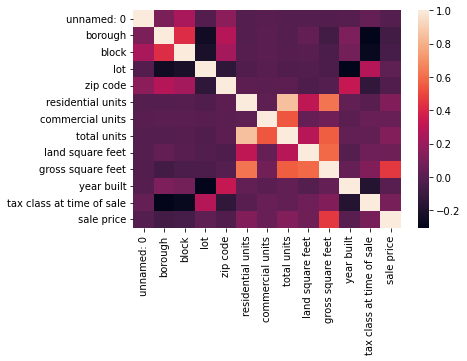

In [19]:
corr = df_x.corr()

sns.heatmap(corr)

In [20]:
corr

,unnamed: 0,borough,block,lot,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,tax class at time of sale,sale price
unnamed: 0,1.000000,0.106953,0.238477,-0.021606,0.153051,-0.018455,-0.000130,-0.015370,-0.017039,-0.021756,-0.014087,0.032557,-0.016296
borough,0.106953,1.000000,0.423501,-0.247629,0.270648,-0.018513,0.001027,-0.015217,0.027861,-0.075202,0.109573,-0.304289,-0.074418
block,0.238477,0.423501,1.000000,-0.218725,0.227258,-0.012872,0.000544,-0.010733,-0.002133,-0.048434,0.077785,-0.279012,-0.061139
lot,-0.021606,-0.247629,-0.218725,1.000000,-0.144875,-0.034380,-0.009377,-0.032360,-0.029186,-0.044188,-0.305981,0.271871,0.012324
zip code,0.153051,0.270648,0.227258,-0.144875,1.000000,0.008487,0.002961,0.008943,-0.035729,-0.019399,0.327517,-0.133982,-0.034170
residential units,-0.018455,-0.018513,-0.012872,-0.034380,0.008487,1.000000,0.013586,0.849182,0.309530,0.618467,0.024217,-0.001961,0.119698
commercial units,-0.000130,0.001027,0.000544,-0.009377,0.002961,0.013586,1.000000,0.539517,0.040804,0.069496,0.005031,0.044016,0.046006
total units,-0.015370,-0.015217,-0.010733,-0.032360,0.008943,0.849182,0.539517,1.000000,0.282088,0.557268,0.022412,0.025205,0.125101
land square feet,-0.017039,0.027861,-0.002133,-0.029186,-0.035729,0.309530,0.040804,0.282088,1.000000,0.591357,-0.017486,0.066022,0.060183
gross square feet,-0.021756,-0.075202,-0.048434,-0.044188,-0.019399,0.618467,0.069496,0.557268,0.591357,1.000000,0.031343,0.121108,0.455423


In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

unnamed: 0                   0
borough                      0
block                        0
lot                          0
zip code                     0
residential units            0
commercial units             0
total units                  0
land square feet             0
gross square feet            0
year built                   0
tax class at time of sale    0
sale price                   0
sale date                    0
dtype: int64

In [23]:
X = df.iloc[:,1:-2]
y = df.iloc[:,-2]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=.33,random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

model.fit(X_train, Y_train)

RandomForestRegressor()

In [27]:
params = {'n_estimators':[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],

    'max_depth':[int(x) for x in np.linspace(5, 30, num = 6)],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]}
          

In [30]:
cv = RandomizedSearchCV(estimator = model, param_distributions = params, scoring = 'neg_mean_squared_error', n_iter = 50, cv = 2, verbose=2, n_jobs = -1)


In [ ]:
cv.fit(X_train,Y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


In [ ]:
cv.best_estimator_

In [ ]:
y_pred = cv.predict(X_test)
y_pred
# score = accuracy_score(y_pred, Y_test)
# score

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


print("RMSE: ", MSE(Y_test, y_pred)**0.5)
print("Correlation: ", np.corrcoef(Y_test, y_pred)[0,1])
print("R-squared: ", r2_score(Y_test,y_pred))